##### Version 0.01 -- Travanj 2017

# Vrtlog

Uzgon (mislimo na *lift*) je sila suprotnog predznaka od? Itko?

Trebali bi nešto naučiti o uzgonu, a prije toga ćemo izračunati potencijalni vrtlog. Jasno, jer su uzgon i vrtlog povezani. Jako.

## Što je vrtlog?

Jednostavan odgovor: vrtlog je gibanje po kružnim strujnicama. Zamislimo strujnice koje su koncentrični krugovi oko neke točke, ali to ne znači da se čestice fluida rotiraju.

U *bezvrtložnom* vrtlogu (hic!), tangencijalna brzina je konstantna duže (kružne) strujnice te je inverzno proporcionalna radijusu, dok je radijalna brzina nula. U polarnim koordinatama to izgleda ovako:

\begin{equation}
u_\theta\left(r,\theta\right) = \frac{\text{constant}}{r}  \quad \text{,} \quad  u_r\left(r,\theta\right) = 0
\end{equation}

Vrtložnost je svugdje nula, osim na samoj točki vrtlogm gdje je derivacija $u_\theta$ beskonačna.

---
Vrijeme je da uvedemo pojam **cirkulacije**, a prvo navedimo par tvrnji:
* Cirkulacija i vrtložnost su dvije osnovne mjere rotacije čestice fluida
* Cirkulacija je *makroskopska* (globalna u odnosu na vrtložnost) mjera rotacije za konačno veliku *površinu* fluida
* Vrtložnost je vektorsko polje koje daje *mikroskopsku* mjeru (veličinu) rotacije u bilo kojoj točki fluida
Sada slijedi malo ozbiljnija definicija:
Cirkulacija $\Gamma$ oko zatvorene krivulje u fluidu je definirana kao linijski integral evaluiran na konturi krivulje, a evaluira se komponenta brzine koja je tangencijalna na krivulju, odnosno, ako koristimo konvenciju da se negativni vrtlog okreće suprotno od kazaljke na satu:

\begin{equation}\Gamma = -\oint \mathbf{v}\cdot d\vec{l} = -u_\theta 2 \pi r\end{equation}

Ovo samo znači da je $\Gamma<0$ za vrtlog koji se okreće suprotno od kazaljke na satu, a $\Gamma>0$ za vrtlog koji se okreće u smjeru kazaljke na satu. 

Cirkulacija se može smatrati kao (ukupna) sila koja djeluje na definiranu zatvorenu krivulju. Dakle, ona je sila koju *dobijamo* kad putujemo po nekakvoj putanji, npr. kružnici. Naime, cirkulacija ima dimenziju $L^2T^{-1}$, dakle brzini pomnoženoj sa duljinom. Ok, pa što onda? Može se izračunati sila uzgona (*lift*) ako se zna brzina fluida koji *nastrujava* na tijelo, na način da se izračuna cirkulacija oko tog tijela. Onda pomnožimo sa gustoćom fluida i brzinom fluida(relativnom) i dobijemo silu uzgona. Ta relacija je poznata pod nazivom *Kutta-Joukowski* teorem:

$$L = \rho V_{\infty} \Gamma$$

A kako je cirkulacija povezana s vrtložnošću?
$$\Gamma = \int_\cal{A} \omega dA$$
gdje je $\cal{A}$ površina *obuhvaćena* zatvorenom krivuljom. Odnosno, ako zbrojimo (dobro, *integriramo*)sve vektore vrtloga u tom području, dobit ćemo istu veličinu ako integriramo sve tangencijalne komponente brzina na krivulji. Dobro? Gornji izraz se još naziva i *Stokes-ov* teorem.

Strujanje koje promatramo nema vrtložnosti, odnosno cirkulacija po svakoj zatvorenoj krivulji iznosi $0$. Zašto? Probat ćemo objasniti na dnu ove lekcije.

---


Konstanta u izrazu za $u_\theta$ u $(1)$ je jednaka $\Gamma/2\pi$ te sada možemo pisati:

\begin{equation}u_\theta\left(r,\theta\right) = \frac{\Gamma}{2\pi r}\end{equation}

Sada možemo izračunati *stream function* integrirajući komponente vektora brzine:

\begin{equation}\psi\left(r,\theta\right) = \frac{\Gamma}{2\pi}\ln r\end{equation}

I kartezijevim koordinatama:

\begin{equation}\psi\left(x,y\right) = \frac{\Gamma}{4\pi}\ln\left(x^2+y^2\right)\end{equation}

gdje su komponente brzine:

\begin{equation}u\left(x,y\right) = \frac{\Gamma}{2\pi}\frac{y}{x^2+y^2} \qquad v\left(x,y\right) = -\frac{\Gamma}{2\pi}\frac{x}{x^2+y^2}\end{equation}

Ovaj **vortex flow** je svuda bezvrtložan, osim u centru vrtloga, gdje je beskonačan. Intenzitet te točke je jednak cirkulaciji $\Gamma$ oko njega.

## Izračunajmo vrtlog

Početak je isti kao i prije

In [2]:
import numpy
import math
from matplotlib import pyplot
# embed the figures into the notebook
%matplotlib inline

In [3]:
N = 50                                # Number of points in each direction
x_start, x_end = -2.0, 2.0            # x-direction boundaries
y_start, y_end = -1.0, 1.0            # y-direction boundaries
x = numpy.linspace(x_start, x_end, N)    # computes a 1D-array for x
y = numpy.linspace(y_start, y_end, N)    # computes a 1D-array for y
X, Y = numpy.meshgrid(x, y)              # generates a mesh grid

Postavimo vrtlogu intenzitet $\Gamma=5$ i postavimo ga u centar domene:

In [4]:
gamma = 5.0                      # strength of the vortex
x_vortex, y_vortex = 0.0, 0.0    # location of the vortex

Definirat ćemo dvije funkcije, 

* `get_velocity_vortex()` and 
* `get_stream_function_vortex()`, 

koje će izračunati komponente brzine i *stream function* na mreži točaka za intenzitet i položaj vrtloga. 

In [5]:
def get_velocity_vortex(strength, xv, yv, X, Y):
    """
    Returns the velocity field generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = + strength/(2*math.pi)*(Y-yv)/((X-xv)**2+(Y-yv)**2)
    v = - strength/(2*math.pi)*(X-xv)/((X-xv)**2+(Y-yv)**2)
    
    return u, v

In [6]:
def get_stream_function_vortex(strength, xv, yv, X, Y):
    """
    Returns the stream-function generated by a vortex.
    
    Parameters
    ----------
    strength: float
        Strength of the vortex.
    xv: float
        x-coordinate of the vortex.
    yv: float
        y-coordinate of the vortex.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(4*math.pi)*numpy.log((X-xv)**2+(Y-yv)**2)
    
    return psi

Pozvat ćemo funkcije sa intenzitetom vrtloga i položajem i koordinatama mreže. Time ćemo dobiti brzine i *stream function* vrtloga.

In [7]:
# compute the velocity field on the mesh grid
u_vortex, v_vortex = get_velocity_vortex(gamma, x_vortex, y_vortex, X, Y)

# compute the stream-function on the mesh grid
psi_vortex = get_stream_function_vortex(gamma, x_vortex, y_vortex, X, Y)

Možemo sada vizualizirati strujnice vrtloga. Kako smo i očekivali, to su koncentrične kružnice oko centra vrtloga.

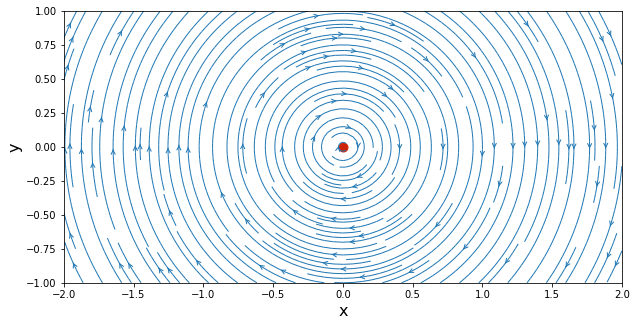

In [8]:
# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u_vortex, v_vortex, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

## Vrtlog i ponor

Superpozicija na djelu. Dodat ćemo vrtlog ponoru pomoću dviju novih funkcija kojim ćemo izračunati komponente brzina i *stream function* ponora. To ćemo dodati vrtlogu. Promjenom predznaka intenziteta ponora, ponor postaje izvor, zar ne?

In [9]:
strength_sink = -1.0            # strength of the sink
x_sink, y_sink = 0.0, 0.0       # location of the sink

In [10]:
def get_velocity_sink(strength, xs, ys, X, Y):
    """
    Returns the velocity field generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    u: 2D Numpy array of floats
        x-component of the velocity vector field.
    v: 2D Numpy array of floats
        y-component of the velocity vector field.
    """
    u = strength/(2*math.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*math.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [11]:
def get_stream_function_sink(strength, xs, ys, X, Y):
    """
    Returns the stream-function generated by a sink.
    
    Parameters
    ----------
    strength: float
        Strength of the sink.
    xs: float
        x-coordinate of the sink.
    ys: float
        y-coordinate of the sink.
    X: 2D Numpy array of floats
        x-coordinate of the mesh points.
    Y: 2D Numpy array of floats
        y-coordinate of the mesh points.
    
    Returns
    -------
    psi: 2D Numpy array of floats
        The stream-function.
    """
    psi = strength/(2*math.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [12]:
# compute the velocity field on the mesh grid
u_sink, v_sink = get_velocity_sink(strength_sink, x_sink, y_sink, X, Y)

# compute the stream-function on the mesh grid
psi_sink = get_stream_function_sink(strength_sink, x_sink, y_sink, X, Y)

Vrijeme je za vizualizaciju i blago divljenje:

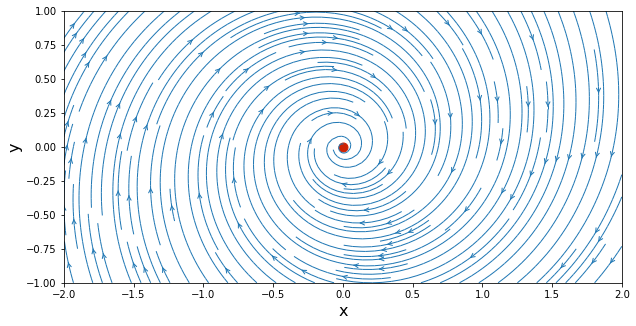

In [13]:
# superposition of the sink and the vortex
u = u_vortex + u_sink
v = v_vortex + v_sink
psi = psi_vortex + psi_sink

# plot the streamlines
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
pyplot.scatter(x_vortex, y_vortex, color='#CD2305', s=80, marker='o');

Ovo može biti i korisno. Moguće je kreirati i *beskonačni slijed vrtloga* (infinite row of vortices).

Slijedi veza između vrtloga i sile uzgona, što postaje dosta bitno...

## Što je *bezvrtložni* vrtlog?

Zvuči kao oksimoron, zar ne?

Što znači da je vrtlog bezvrtložan (*irrotational*)?

Potencijalni vrtlog je strujanje gdje su strujnice kružne, ali čestice fluida same ne rotiraju. Samo se gibaju kružnom putanjom. Zašto se ne rotiraju? Jer rotacija ovisi samo o jednoj, viskoznoj sili. A naš fluid je idealan. Ili $\nu=0$. To smo napisali u [prvoj lekciji](00_malo_teorije.ipynb).

Klasici su uvijek u crno bijeloj tehnici :-) Pogledajte cca 30 sekundi nakon 4m 25s.

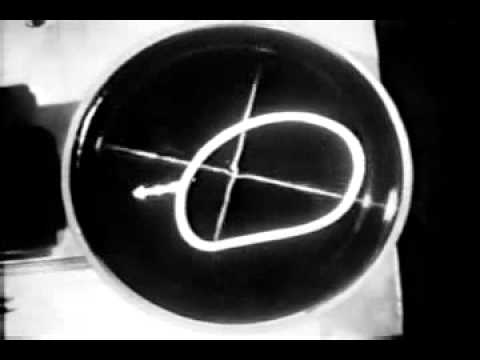

In [14]:
from IPython.display import YouTubeVideo
from datetime import timedelta

start=int(timedelta(hours=0, minutes=4, seconds=25).total_seconds())

YouTubeVideo("loCLkcYEWD4", start=start)

Vrtložnost mjeri lokalnu kutnu brzinu svake čestice fluida. Ako se fluid giba kružnom putanjom, a sam se ne vrti, onda nema vrtložnosti.

Ova animacija s [Wikipedia](http://en.wikipedia.org/wiki/Vortex#Irrotational_vortices) ilustrira što se događa u *bezvrtložnom* vrtlogu: narančasti se markeri kružno gibaju, ali se oni sami ne rotiraju (bijele linije zadržavaju svoju orijentaciju).

<img src="http://upload.wikimedia.org/wikipedia/commons/0/0b/Irrotational_vortex.gif">




---

In [15]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom.css', 'r').read()
    return HTML(styles)
css_styling()